In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import UMAP
import plotly.express as px
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from plotly.figure_factory import create_dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.metrics.pairwise import cosine_similarity


sns.set_style('white')

In [5]:
#px2um_Apical_dendrite101_sa5um_rotate.csv文件中记录了A类神经元距离胞体不同半径下的神经元分支数

table_df = pd.read_csv('./px2um_Apical_dendrite101_sa5um_rotate.csv', sep=',', header=0, index_col=0)
print(list(table_df.columns))
table_df = table_df.iloc[:, 0:60]
# table_df
for i in table_df.index:
    for j in ['01645']:
        if i.startswith(j):
            print(t2_df.loc[i,'BrainRgn'])
            table_df.drop(i, inplace=True)
table_df

['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100', '105', '110', '115', '120', '125', '130', '135', '140', '145', '150', '155', '160', '165', '170', '175', '180', '185', '190', '195', '200', '205', '210', '215', '220', '225', '230', '235', '240', '245', '250', '255', '260', '265', '270', '275', '280', '285', '290', '295', '300', '305', '310', '315', '320', '325', '330', '335', '340', '345', '350', '355', '360', '365', '370', '375', '380', '385', '390', '395', '400', '405', '410', '415', '420', '425', '430', '435', '440', '445', '450', '455', '460', '465', '470', '475', '480', '485', '490', '495', '500', '505', '510', '515', '520', '525', '530', '535', '540', '545', '550', '555', '560', '565', '570', '575', '580', '585', '590', '595']
PL


,0,5,10,15,20,25,30,35,40,45,...,250,255,260,265,270,275,280,285,290,295
Distance_to_soma,,,,,,,,,,,,,,,,,,,,,
00023_P001_T01-S001_MFG_R0460_WY-20220415_GYC_stamp_2022_08_31_14_32,10,10,10,11,14,15,15,16,18,21,...,0,0,0,0,0,0,0,0,0,0
00030_P001_T01-S001_MFG_R0460_WY-20220415_GYC_stamp_2022_08_31_14_36,10,10,10,10,10,12,13,15,16,17,...,0,0,0,0,0,0,0,0,0,0
00031_P001_T01-S001_MFG_R0460_WY-20220415_GYC_stamp_2022_08_31_14_39,8,8,8,8,8,10,10,9,11,13,...,0,0,0,0,0,0,0,0,0,0
00044_P001_T01-S002_MFG_R0460_WY-20220415_YXQ_stamp_2022_08_31_14_42,8,8,8,10,11,12,12,12,13,18,...,0,0,0,0,0,0,0,0,0,0
00045_P001_T01-S002_MFG_R0460_WY-20220415_YXQ_stamp_2022_06_24_16_16,8,8,8,9,10,14,23,25,30,35,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01678_P018_T01-S014_SPL_R0919_LJ-20220728_YXQ_stamp_2022_08_27_13_21,6,6,6,6,6,8,12,15,16,17,...,3,4,4,4,3,3,3,3,3,2
01683_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_stamp_2022_08_27_13_28,11,11,11,13,18,24,25,27,29,26,...,0,0,0,0,0,0,0,0,0,0
01684_P018_T01-S014_SPL_R0613_LJ-20220728_YXQ_stamp_2022_08_27_13_31,9,9,9,10,13,15,18,24,27,27,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# px2um_Apical_dendrite101_sa5um_rotate.csv文件中记录了B类神经元距离胞体不同半径下的神经元分支数


# table_df = pd.read_csv('./px2um_Basal_dendrite259_sa5um_rotate.csv', sep=',', header=0, index_col=0)
# print(list(table_df.columns))
# table_df = table_df.iloc[:, 0:60]
# # table_df
# for i in table_df.index:
#     for j in ['00906', '00912', '00913']:
#         if i.startswith(j):
#             print(t2_df.loc[i,'BrainRgn'])
#             table_df.drop(i, inplace=True)
# table_df

In [6]:
# t2_new.csv文件相对于T1增加了新的分类特征“ A, B, T”，根据神经元分支的分布，将852个数据重新分为A、B、T三个大类。
# 其中，A类神经元的顶树突在XY成像平面中排列良好
# B类神经元具有沿Z轴定向的顶树突，即与XY成像平面正交，因此在原始图像中基本可见基底树突
t2_df = pd.read_csv('./t2_new.csv', sep=',', header=0, index_col=0)
t2_df.index = [i.split('.')[0] for i in t2_df.index]
t2_df = t2_df.loc[table_df.index, :]

labels_ori = t2_df[['BrainRgn', 'Age', 'Sex']]

hue_type = 'BrainRgn'


['Orientation', 'BrainRgn', 'Age', 'Sex', 'Nodes', 'SomaSurface', 'Stems', 'Bifurcations', 'Branches', 'Tips', 'OverallWidth', 'OverallHeight', 'OverallDepth', 'AverageDiameter', 'Length', 'Surface', 'Volume', 'MaxEuclideanDistance', 'MaxPathDistance', 'MaxBranchOrder', 'AverageContraction', 'AverageFragmentation', 'AverageParent-daughterRatio', 'AverageBifurcationAngleLocal', 'AverageBifurcationAngleRemote', 'HausdorffDimension'] 

['A']
ori labels:  ['MFG' 'IPL' 'TP' 'STG' 'SFG' 'PL' 'SMIFG']
TP       30
MFG      24
IPL      18
PL       14
STG      10
SFG       3
SMIFG     1
Name: BrainRgn, dtype: int64 



# A、B类神经元对应的树状图和热力分布图

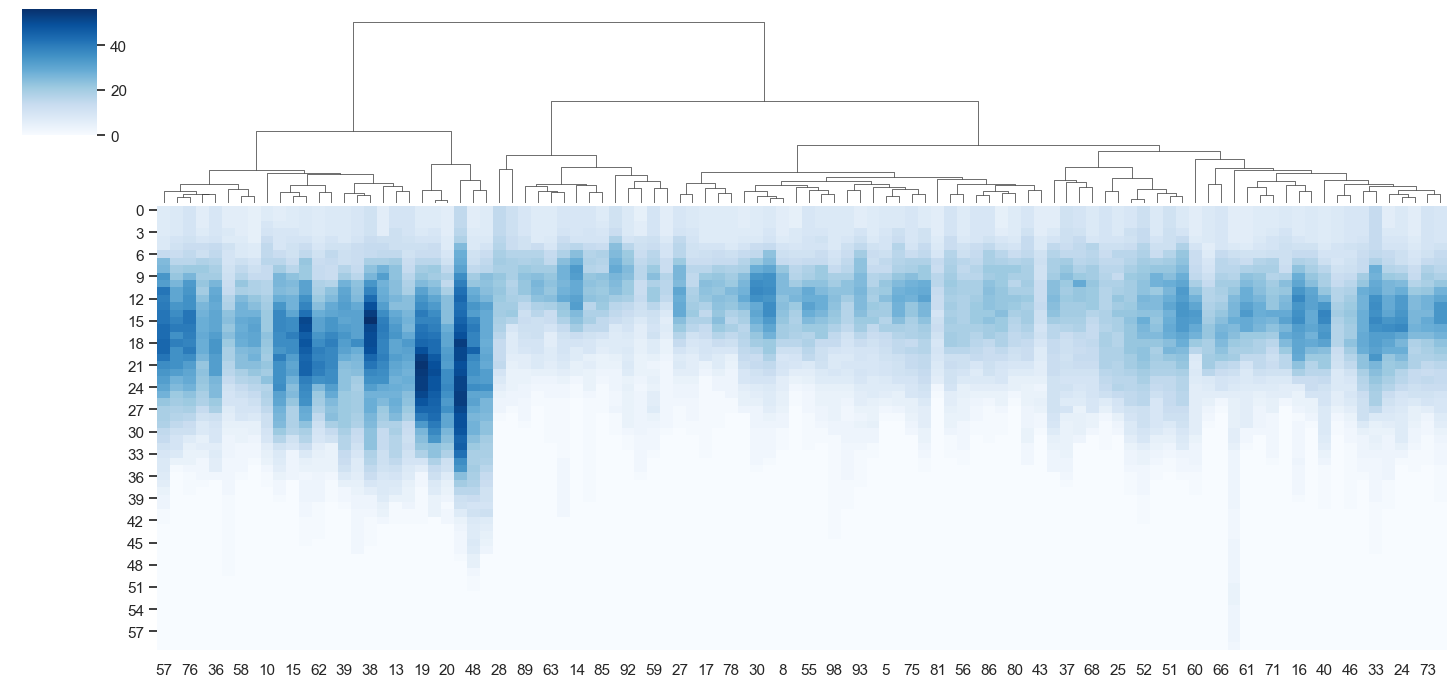

In [7]:
#分别绘制A类和B类神经元特定半径下神经元数量对应的树状图和热力分布图

# 树状图和热力分布图
data_df = table_df.T
sns.set(style='white')
g = sns.clustermap(data_df.values, cmap= 'Blues',
                    col_cluster=True, row_cluster=False, 
#                     col_colors=[cl2color[i] for i in labels], 
                   figsize=(15,7),
                   dendrogram_ratio=(0.1, 0.3),
                   metric='cosine'
#                    method = 'centroid'
                   )

g.ax_heatmap.tick_params('y',which='major', left=True, right=False, reset=True,)

g.savefig('./clustermap.png', dpi=200,bbox_inches='tight')

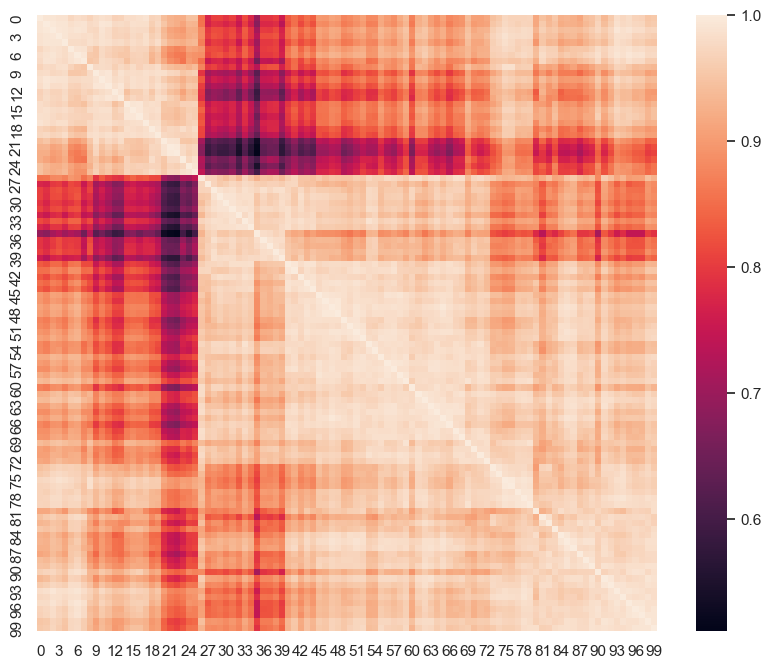

In [8]:
# corre_matrix下的热力分布图
gdata2d = g.data2d.T.copy()
corre_matrix = np.eye((len(gdata2d)), len(gdata2d))
for i in range(len(corre_matrix)):
    for j in range(len(corre_matrix)):
        if j == i:
            continue
#         tmp = np.corrcoef(gdata2d.iloc[i, :], gdata2d.iloc[j, :])
#         corre_matrix[i,j] = tmp[0][1]
        tmp = cosine_similarity(gdata2d.iloc[i, :].values.reshape(1, -1), gdata2d.iloc[j, :].values.reshape(1, -1))
        corre_matrix[i,j] = tmp

        
sns.set(style='white', )
f, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(corre_matrix, ax=ax)
plt.savefig('corre_matrix_heatmap.png', dpi=200, bbox_inches='tight')

# NMI直方图

[1 2 3]
[3 3 3 3 3 3 3 3 3 3 1 1 1 1 2 1 3 3 3 1 1 3 1 1 3 3 3 3 2 1 3 1 1 3 3 3 1
 3 1 1 3 2 2 3 3 3 3 1 1 1 1 3 3 3 2 3 3 1 1 2 3 3 1 2 3 3 3 3 3 1 3 3 3 3
 3 3 1 2 3 3 3 3 3 3 3 2 3 3 1 2 1 3 2 3 2 3 2 2 3 3]


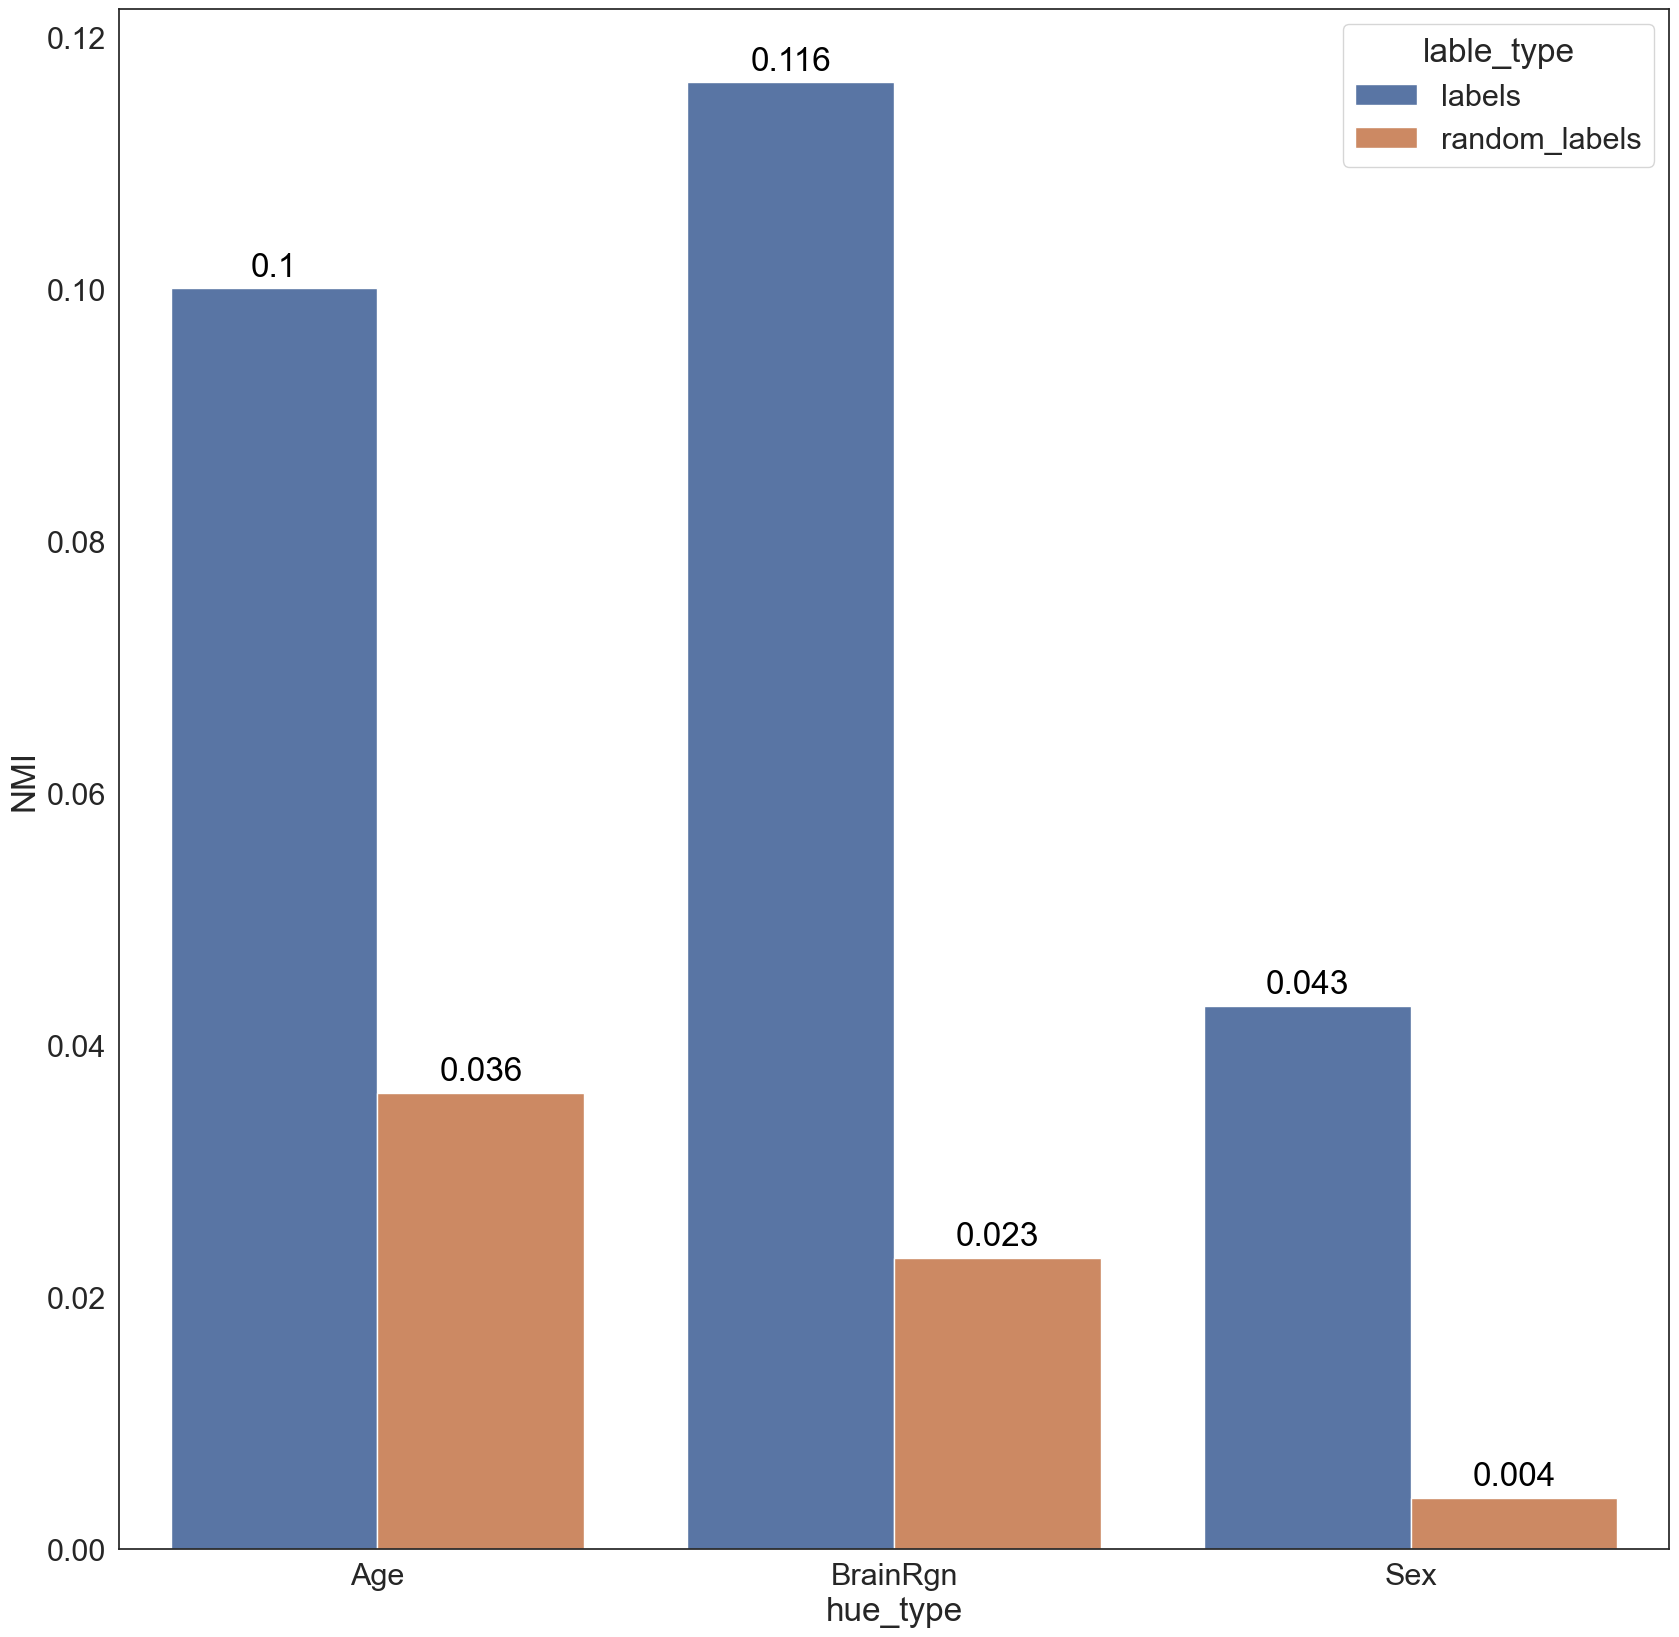

In [9]:
# 根据热力分布图的叶节点将神经元分为3类，并按照类别重新排序
# 除根据聚类树图根结点的分类标签外，给每个数据随机插入10个标签
# 分别计算NMI(normalized mutual information，用于衡量在特定标签划分下数据间的分布差异情况，其值越大，分布差异越大)值，绘制直方图
# NMI直方图进一步证明了树状图分类标签的合理性
Z = g.dendrogram_col.linkage
clustering_labels = fcluster(Z, t=0.08, criterion='distance')
print(np.unique(clustering_labels))
print(clustering_labels)

table_df['labels'] = clustering_labels
data_df = table_df[['labels']].T
data_df = data_df.iloc[:, g.data2d.columns.tolist()]
data_df = data_df.T
data_df['BrainRgn'] = 0
data_df['Age'] = 0
data_df['Sex'] = 0
for i in data_df.index:
    data_df.loc[i,'BrainRgn'] = labels_ori.loc[i,'BrainRgn']
    data_df.loc[i,'Age'] = labels_ori.loc[i,'Age']
    data_df.loc[i,'Sex'] = labels_ori.loc[i,'Sex']

# 插入10个随机标签
for i in range(10):
    data_df['random_labels'+str(i+1)] = np.random.randint(1,len(np.unique(clustering_labels)),len(clustering_labels))
data_df

MI_df = pd.DataFrame(columns=['lable_type', 'hue_type', 'NMI'])
for lt_i in ['labels']+['random_labels'+str(i+1) for i in range(10)]:
    for ht_j in ['BrainRgn', 'Age', 'Sex']:
        if lt_i.startswith('random'):
            lt_i1 = 'random_labels'
        else:
            lt_i1 = lt_i
        tmp_df = pd.DataFrame({'lable_type':[lt_i1], 'hue_type': [ht_j], 'NMI':[normalized_mutual_info_score(data_df[lt_i], data_df[ht_j])]})
        MI_df = pd.concat([MI_df, tmp_df], axis=0)
MI_df

group_values = MI_df.groupby(['hue_type','lable_type']).mean().reset_index()
# group_values.sort_values('hue_type', o)
group_values.sort_values('hue_type', inplace=True)
group_values

coordinates_dict = {'Age':0, 'BrainRgn':1, 'Sex':2}
offset_dict = {'labels':-0.2, 'random_labels':0.2}

# 绘制NMI直方图
sns.set(style='white', font_scale=2,)
plt.figure(figsize=(20,20))
g = sns.barplot(data = group_values, x='hue_type', y='NMI', hue='lable_type')

for index,row in group_values.iterrows():
    g.text(coordinates_dict[row.hue_type]+offset_dict[row.lable_type], row.NMI+0.001, round(row.NMI,3),color="black",ha="center")
plt.savefig('./MI.png', dpi=200, bbox_inches='tight')